In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [3]:
df = pd.read_csv('../data/auto-mpg.csv')  # Path relatif dari notebooks/
print(df.head())
print(df.info())
print(df.tail)
print(df.sample(5))

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           30 non-null     float64
 1   cylinders     30 non-null     int64  
 2   displacement  30 non-null     float64
 3   horsepower    30 non-null     float64
 4   weight        30 non-null     int64  
 5   acceleration  30 non-null  

Cek Nilai Unik/Kategori

In [4]:
for col in df.columns:
    print(f'{col}:', df[col].unique())
# Visualisasi distribusi dari kolom 'mpg'
plt.figure(figsize=(10, 6)) 

mpg: [18. 15. 16. 17. 14. 24. 22. 21. 27. 26. 25. 10. 11.  9. 28. 19.]
cylinders: [8 4 6]
displacement: [307. 350. 318. 304. 302. 429. 454. 440. 455. 390. 113. 198. 199. 200.
  97. 110. 107. 104. 121. 360. 140. 232. 225.]
horsepower: [130. 165. 150. 140. 198. 220. 215. 225. 190.  95.  97.  85.  88.  46.
  87.  90. 113. 200. 210. 193. 100. 105.]
weight: [3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 2372 2833 2774 2587
 2130 1835 2672 2430 2375 2234 2648 4615 4376 4382 4732 2264 2228 2634
 3439]
acceleration: [12.  11.5 11.  10.5 10.   9.   8.5 15.  15.5 16.  14.5 20.5 17.5 12.5
 14.  13.5 18.5 13. ]
model_year: [70 71]
origin: [1 3 2]


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Cek Missing Value

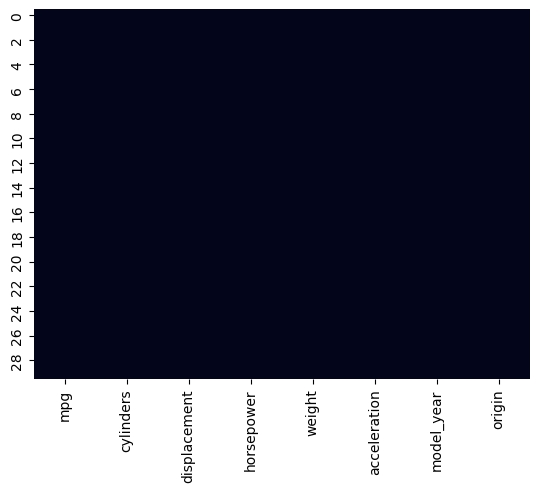

In [5]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)
plt.show()
# Visualisasi distribusi dari kolom 'mpg'


#### Basic visualisation
#### Target Distribution (mpg)

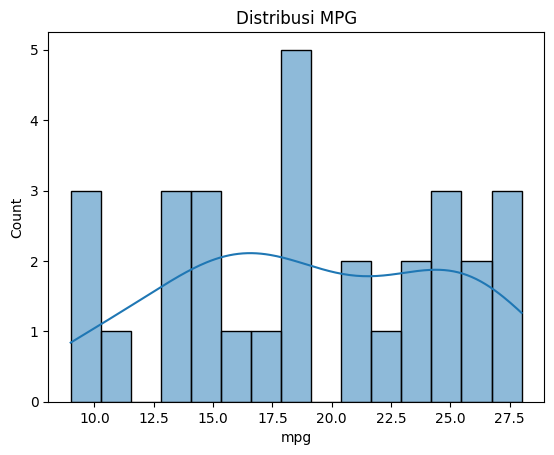

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [6]:
sns.histplot(df['mpg'], bins=15, kde=True)
plt.title('Distribusi MPG')
plt.show()
# Visualisasi distribusi dari kolom 'cylinders'
plt.figure(figsize=(10, 6))      

## Distribution each feature

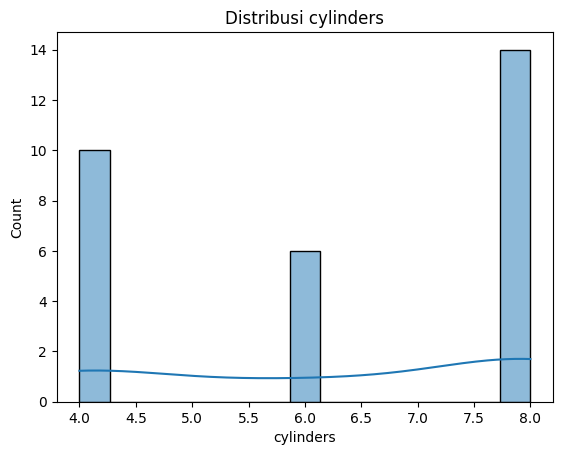

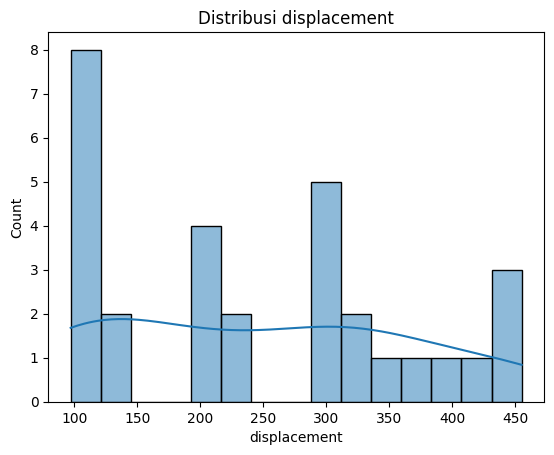

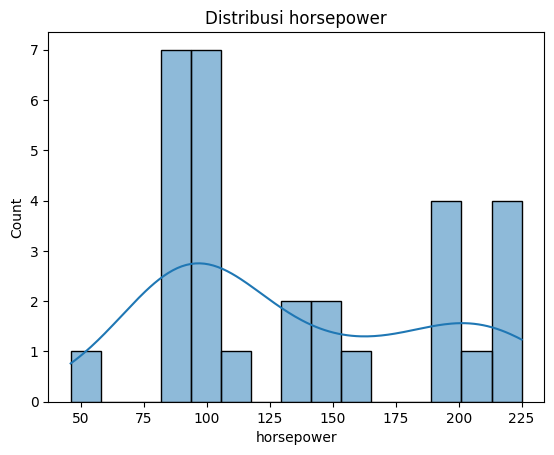

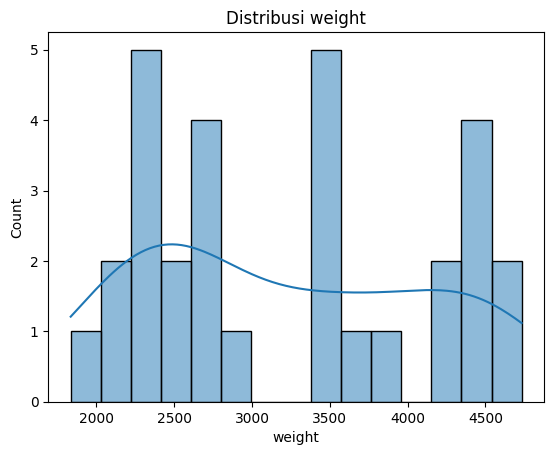

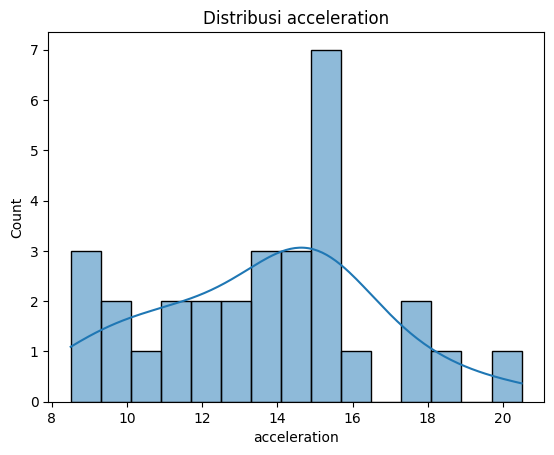

In [7]:
for col in ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']:
    sns.histplot(df[col], bins=15, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()


## Corellation feature

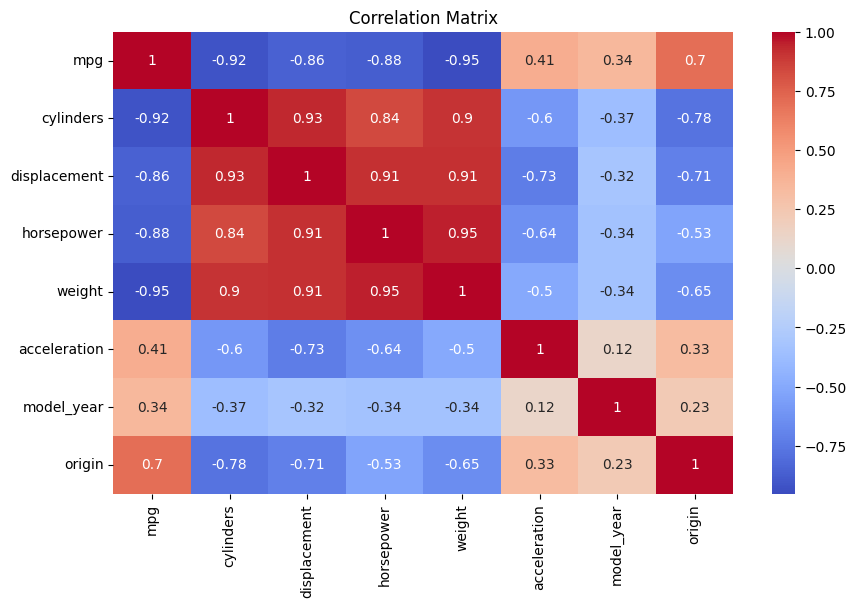

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Visualisasi distribusi dari kolom 'origin'
plt.figure(figsize=(10, 6))

## Outlier analysis

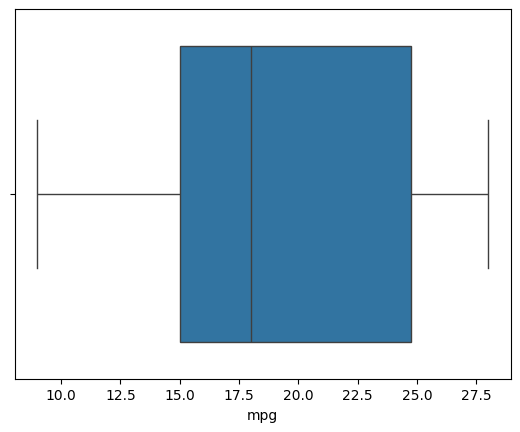

In [9]:
sns.boxplot(data=df, x='mpg')
plt.show()


## Analysis feature correlation

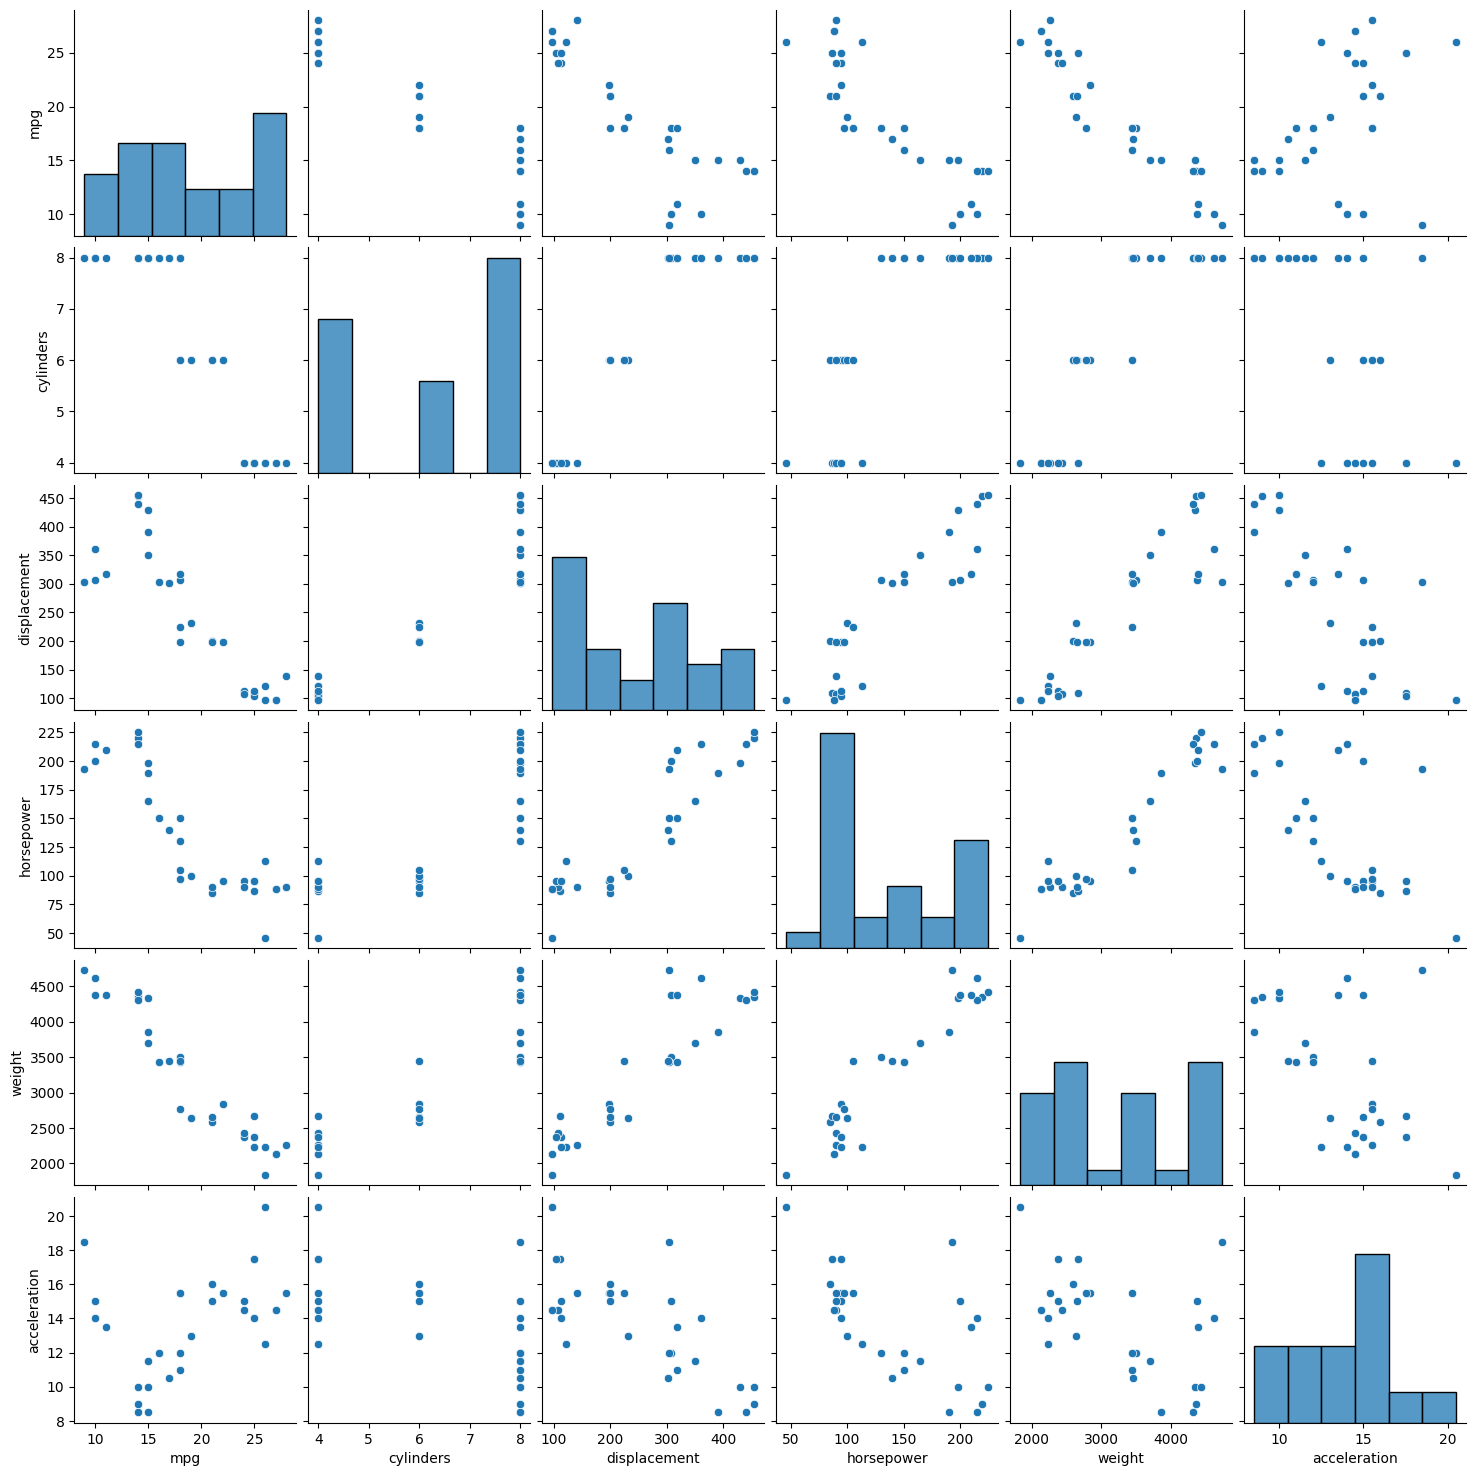

In [10]:
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']])
plt.show()


## Insights:
- Most vehicles in the dataset have either 4 or 8 cylinders.
- The variables weight and displacement show a strong negative correlation with mpg—as they increase, fuel efficiency tends to decrease.
- There appear to be some outliers in the horsepower feature.

## Call src/ function

In [1]:
import sys
sys.path.append('../src')
from fuel_efficiency_predictor import FuelEfficiencyPredictor



In [2]:
import sys
sys.path.append('../src')
from fuel_efficiency_predictor import FuelEfficiencyPredictor

predictor = FuelEfficiencyPredictor("../data/auto-mpg.csv")
predictor.load_data()
predictor.explore_data()
predictor.train_model(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year'], 'mpg')
predictor.evaluate_model()


Data loaded! Shape: (30, 8)

--- Data Overview ---
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           30 non-null     float64
 1   cylinders     30 non-null     int64  
 2   displacement  30 non-null     float64
 3   horsepower    30 non-null     float64
 4   weigh

## 📊 Explanation of Output: Data and Model Analysis

### 1. Data loaded! Shape: (30, 8)
- The dataset contains **30 rows (cars)** and **8 columns (features/variables)**.
- Each row = one car, each column = technical specification (mpg, cylinders, etc.).

---

### 2. Data Overview
- Shows the first 5 rows:
  - **mpg**: Target for prediction (Miles per Gallon, higher = more efficient)
  - **cylinders**: Number of engine cylinders
  - **displacement**: Engine displacement (cubic inches)
  - **horsepower**: Engine power (HP)
  - **weight**: Car weight (pounds)
  - **acceleration**: 0–60 mph acceleration time (seconds)
  - **model_year**: Model year (70 = 1970)
  - **origin**: Country code (1 = USA, 2 = Europe, 3 = Japan)

---

### 3. Data Info
- All columns have **no missing values** (complete data)
- Data types: float and integer, ready for ML analysis

---

### 4. Descriptive Statistics
- Average mpg = **19.07**, min = **9.0**, max = **28.0**
- Car weights vary greatly (1835–4732 lbs), showing diverse car types
- Most data from model year 1970 and from the USA (`origin` = 1)

---

### 5. Model trained!
- Linear Regression model has been successfully trained on the data.

---

### 6. Model


## 📊 Penjelasan Output Analisis Data dan Model

### 1. Data loaded! Shape: (30, 8)
- Dataset berisi **30 baris (mobil)** dan **8 kolom (fitur/variabel)**.
- Setiap baris = 1 mobil, setiap kolom = fitur teknis seperti mpg, cylinders, dsb.

---

### 2. Data Overview
- Menampilkan 5 baris pertama data:
  - **mpg**: Target prediksi (konsumsi BBM, semakin besar = semakin irit)
  - **cylinders**: Jumlah silinder mesin
  - **displacement**: Kapasitas mesin (cc, cubic inches)
  - **horsepower**: Tenaga mesin (HP)
  - **weight**: Berat mobil (pounds)
  - **acceleration**: Waktu akselerasi 0–60 mph (detik)
  - **model_year**: Tahun pembuatan (70 = 1970)
  - **origin**: Negara asal (1 = USA, 2 = Europe, 3 = Japan)

---

### 3. Inf
